### Importing required libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_image(img : np.array):
    plt.figure(figsize = (6, 6))
    plt.imshow(img)
    
def plot_two_imgages(img1 : np.array, img2 : np.array):
    _, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].imshow(img1, cmap = 'gray')
    ax[1].imshow(img2, cmap = 'gray')

### Loading the Data

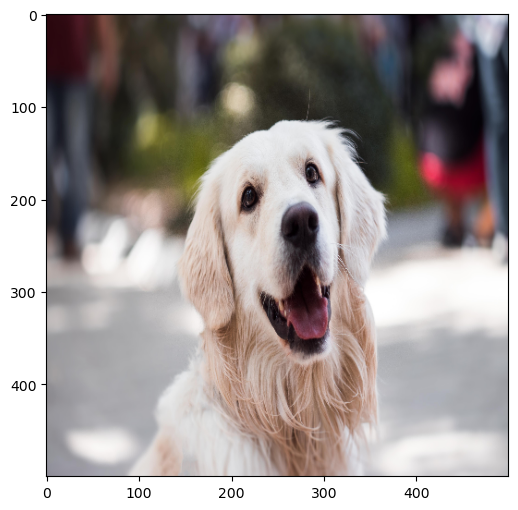

In [3]:
# reading a color image using cv2
img = cv2.imread('dog.jpg')

# converting the color image to gray scale image so as to pass it to convolve function
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mat_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# reshaping the image to get even shape
resized_image = cv2.resize(mat_img, (500, 500)) 

plot_image(img = resized_image)

### Padding the Original Images to retain the information after convolution

In [4]:
def get_padding_width_per_side(kernel_size : int):
    return kernel_size // 2

In [5]:
pad_3x3 = get_padding_width_per_side(3)
pad_3x3

1

In [6]:
pad_5x5 = get_padding_width_per_side(5)
pad_5x5

2

In [7]:
def add_padding_to_image(img, padding_width):
    img_with_padding = np.zeros([(img.shape[0] + padding_width * 2), (img.shape[0] + padding_width * 2), 3])
    
    r_pad = img_with_padding[:, :, 0]
    g_pad = img_with_padding[:, :, 1]
    b_pad = img_with_padding[:, :, 2]
    
    r_pad[padding_width : -padding_width, padding_width : -padding_width] = img[:, :, 0]
    g_pad[padding_width : -padding_width, padding_width : -padding_width] = img[:, :, 1]
    b_pad[padding_width : -padding_width, padding_width : -padding_width] = img[:, :, 2]
    
    fin_arr = np.dstack((r_pad, g_pad, b_pad))
    return fin_arr

### Padding for a convolution filter of kernel size 3X3

(502, 502, 3)


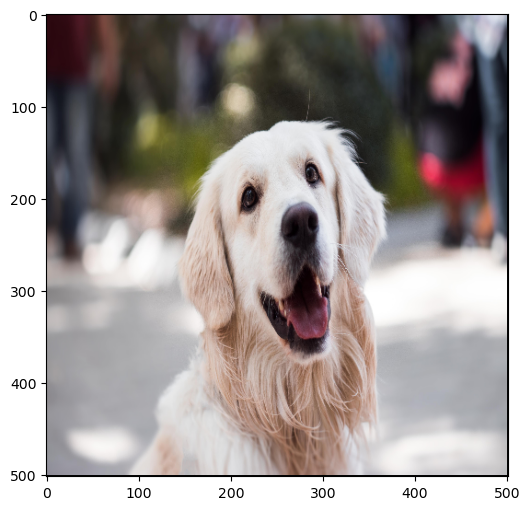

In [8]:
img_with_padding_3x3 = add_padding_to_image(resized_image, pad_3x3)
img_with_padding_3x3 = img_with_padding_3x3.astype(np.uint8)
print(img_with_padding_3x3.shape)

plot_image(img_with_padding_3x3)

### Padding for a convolution filter of kernel size 5X5

(504, 504, 3)


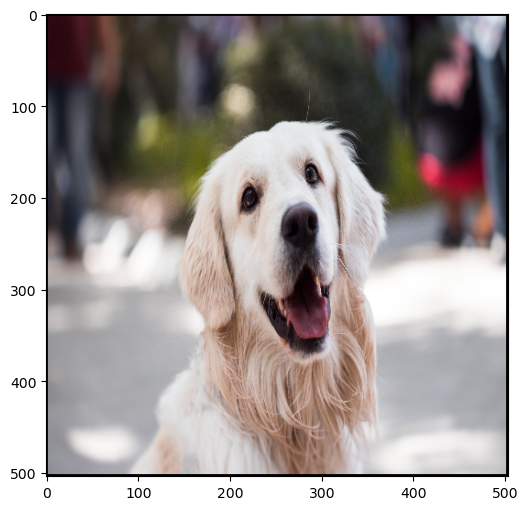

In [9]:
img_with_padding_5x5 = add_padding_to_image(resized_image, pad_5x5)
img_with_padding_5x5 = img_with_padding_5x5.astype(np.uint8)
print(img_with_padding_5x5.shape)

plot_image(img_with_padding_5x5)